In [14]:
import pandas as pd
import scipy.stats as st
import pingouin as pg
from statsmodels.formula.api import ols
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.graphics.factorplots import interaction_plot

In [2]:
ex_15_2 = pd.read_excel('hw6.xlsx', sheet_name='15.2')
ex_15_6 = pd.read_excel('hw6.xlsx', sheet_name='15.6')
ex_15_10 = pd.read_excel('hw6.xlsx', sheet_name='15.10')

## 15.1

In [3]:
# b

n = 5
comb = math.factorial(n)
print(f"Total combos: {comb}")

Total combos: 120


In [4]:
# c - using comb from b

farms = 10

total_comb = comb**farms
print(f"Total combos among farms: {total_comb}")

Total combos among farms: 619173642240000000000


## 15.2

In [5]:
ex_15_2

,Yields,Farm,Irrigation
0,597,1,Surface
1,636,2,Surface
2,591,3,Surface
3,603,4,Surface
4,649,5,Surface
5,512,6,Surface
6,588,7,Surface
7,689,8,Surface
8,690,9,Surface
9,608,10,Surface


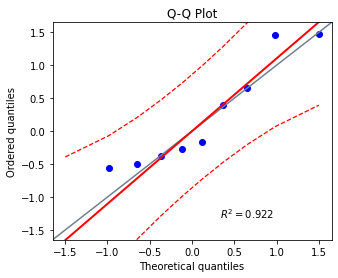

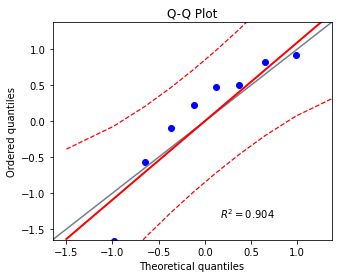

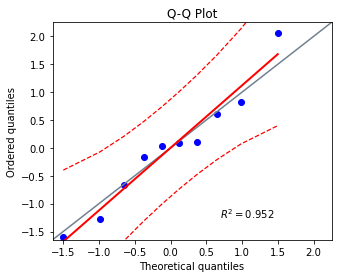

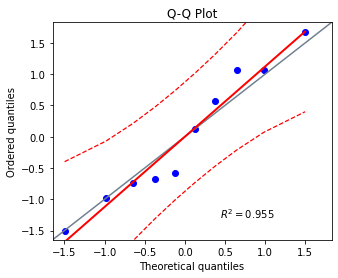

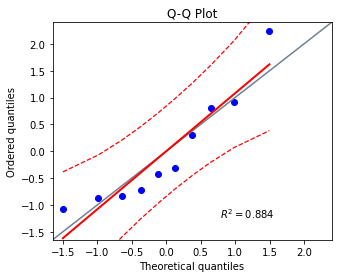

In [6]:
for irr_type in ex_15_2['Irrigation'].unique():
    ax = pg.qqplot(ex_15_2[ex_15_2['Irrigation'] == irr_type]['Yields'], dist='norm')

<AxesSubplot:xlabel='None-Irrigation', ylabel='None-Irrigation'>

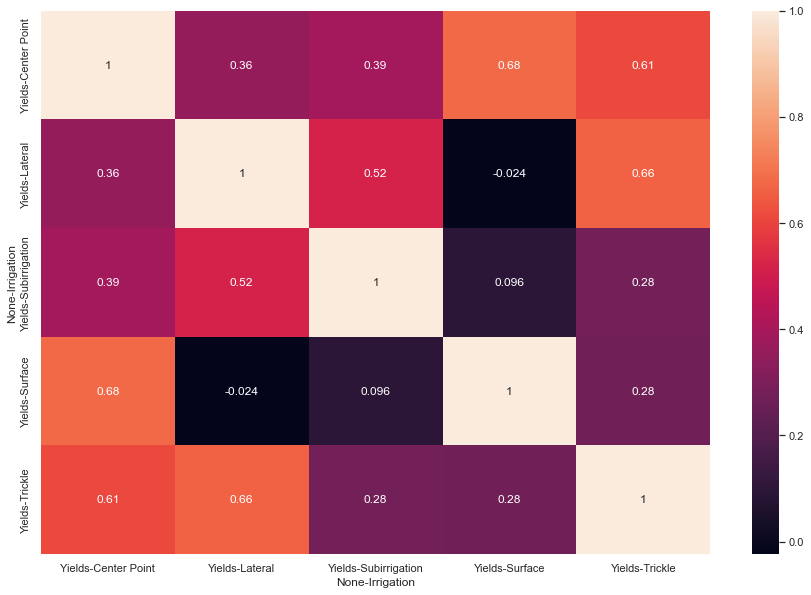

In [7]:
# set the canvas size
sns.set(rc={"figure.figsize":(15, 10)})

sns.heatmap(ex_15_2.pivot(index='Farm', columns='Irrigation').corr(), annot=True)

In [3]:
model = ols('Yields ~ C(Farm) + C(Irrigation)', data=ex_15_2).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Farm),9.0,72946.32,8105.146667,3.900024,1.572073e-03
C(Irrigation),4.0,408443.32,102110.830000,49.133556,4.232071e-14
Residual,36.0,74816.28,2078.230000,NaN,NaN


<AxesSubplot:xlabel='Yields'>

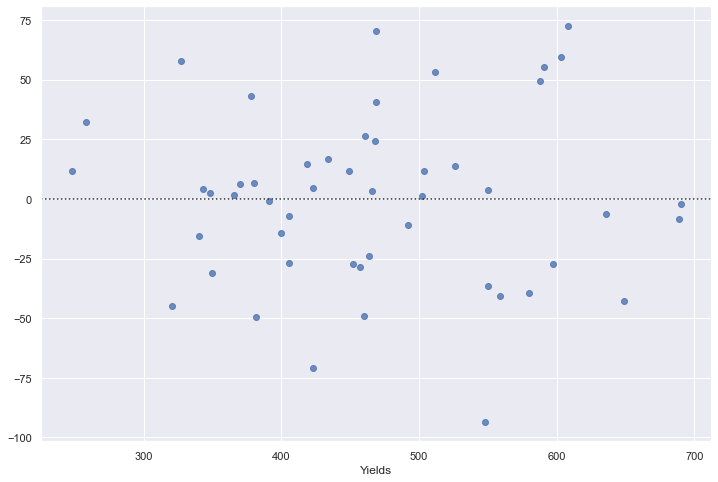

In [9]:
fig = plt.figure(figsize=(12,8))

sns.residplot(x=ex_15_2['Yields'], y=model.predict())

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Yields   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     17.82
Date:                Wed, 18 May 2022   Prob (F-statistic):           6.72e-12
Time:                        18:44:22   Log-Likelihood:                -253.72
No. Observations:                  50   AIC:                             535.4
Df Residuals:                      36   BIC:                             562.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [11]:
# b - standard error

err = math.sqrt(anova_table.loc['Residual', 'mean_sq'])
se = err / math.sqrt(len(ex_15_2['Farm'].unique()))

print(f"Standard error: {se}")


Standard error: 14.416067424925567


In [12]:
# c - standard error in mean yields of two methods

sel = 2

err = math.sqrt(anova_table.loc['Residual', 'mean_sq'])
se = err * math.sqrt(sel / len(ex_15_2['Farm'].unique()))

print(f"Standard error: {se}")

Standard error: 20.387398068414715


In [13]:
# d - determining difference in means 
# Ho: All means are equal
# Ha: At least one mean is different 

alpha = 0.05
df_1 = anova_table.loc['C(Irrigation)', 'df']
df_2 = anova_table.loc['Residual', 'df']

crit_val = st.f.ppf(1 - alpha, df_1, df_2)
print(f"Critical value: {crit_val}")

Critical value: 2.6335320942137526


In [14]:
alpha = 0.05
df_1 = 2
df_2 = 6

crit_val = st.f.ppf(1 - alpha, df_1, df_2)
print(f"Critical value: {crit_val}")

Critical value: 5.143252849784718


In [9]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=ex_15_2['Yields'], 
                                            groups=ex_15_2['Irrigation'],
                                            alpha=0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Center Point,Lateral,33.2,0.6953,-39.6167,106.0167,False
Center Point,Subirrigation,-65.7,0.0947,-138.5167,7.1167,False
Center Point,Surface,151.9,0.0,79.0833,224.7167,True
Center Point,Trickle,-111.2,0.0007,-184.0167,-38.3833,True
Lateral,Subirrigation,-98.9,0.0032,-171.7167,-26.0833,True
Lateral,Surface,118.7,0.0003,45.8833,191.5167,True
Lateral,Trickle,-144.4,0.0,-217.2167,-71.5833,True
Subirrigation,Surface,217.6,0.0,144.7833,290.4167,True
Subirrigation,Trickle,-45.5,0.4001,-118.3167,27.3167,False
Surface,Trickle,-263.1,0.0,-335.9167,-190.2833,True


## 15.6

In [6]:
# ex_15_6

,Speed,Subject,Music
0,20,1,No Music
1,17,2,No Music
2,24,3,No Music
3,20,4,No Music
4,22,5,No Music
5,25,6,No Music
6,18,7,No Music
7,20,1,Hard Rock
8,18,2,Hard Rock
9,23,3,Hard Rock


In [10]:
model = ols('Speed ~ C(Subject) + C(Music)', data=ex_15_6).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Subject),6.0,149.333333,24.888889,10.523490,0.000346
C(Music),2.0,30.952381,15.476190,6.543624,0.011978
Residual,12.0,28.380952,2.365079,NaN,NaN


In [11]:
df_total = anova_table['df'].sum()
ss_total = round(anova_table['sum_sq'].sum(), 4)
print(f"Total df: {df_total}")
print(f"Total SS: {ss_total}")

Total df: 20.0
Total SS: 208.6667


In [18]:
ss_trt = anova_table.loc['C(Music)', 'sum_sq']
df_trt = anova_table.loc['C(Music)', 'df']

ss_err = anova_table.loc['Residual', 'sum_sq']
df_err = anova_table.loc['Residual', 'df']

numer = ss_trt / df_trt
denom = ss_err / df_err

f_val = numer / denom
print(f"F statistic: {f_val}")

alpha = 0.05
f_crit = st.f.ppf(1 - alpha, df_trt, df_err)
print(f"Critical value: {f_crit}")

F statistic: 6.5436241610738355
Critical value: 3.8852938346523933


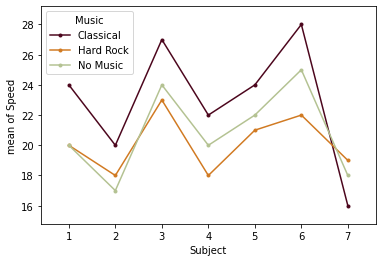

In [16]:
fig = interaction_plot(x=ex_15_6['Subject'], trace=ex_15_6['Music'], response=ex_15_6['Speed'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

In [22]:
b = anova_table.loc['C(Subject)', 'df'] + 1
t = anova_table.loc['C(Music)', 'df'] + 1
print(f"b: {b}\nt: {t}")

msb = anova_table.loc['C(Subject)', 'mean_sq']
mse = anova_table.loc['Residual', 'mean_sq']

numer = ((b - 1) * msb) + (b * (t - 1) * mse)
denom = (b * t - 1) * mse

re = numer / denom
print(f"RE(RCB, CR) = {re}")

b: 7.0
t: 3.0
RE(RCB, CR) = 3.8570469798657694


## 15.10

In [7]:
# ex_15_10

,Mileage,Driver,Model,Gasoline
0,15.5,1,1,A
1,33.8,1,2,B
2,13.7,1,3,C
3,29.2,1,4,D
4,16.3,2,1,B
5,26.4,2,2,C
6,19.1,2,3,D
7,22.5,2,4,A
8,10.5,3,1,C
9,31.5,3,2,D


In [35]:
ex_15_10['Mileage'].mean()

22.243750000000002

In [34]:
ex_15_10.groupby(['Driver']).agg('mean').drop(columns=['Model']) - ex_15_10['Mileage'].mean()

,Mileage
Driver,
1,0.80625
2,-1.16875
3,0.15625
4,0.20625


In [36]:
ex_15_10.groupby(['Model']).agg('mean').drop(columns=['Driver']) - ex_15_10['Mileage'].mean()

,Mileage
Model,
1,-8.16875
2,9.30625
3,-4.74375
4,3.60625


In [37]:
ex_15_10.groupby(['Gasoline']).agg('mean').drop(columns=['Driver', 'Model']) - ex_15_10['Mileage'].mean()

,Mileage
Gasoline,
A,0.25625
B,2.73125
C,-4.19375
D,1.20625


In [50]:
model = ols('Mileage ~ C(Driver) + C(Model) + C(Gasoline)', data=ex_15_10).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Driver),3.0,8.331875,2.777292,0.644290,0.614277
C(Model),3.0,755.371875,251.790625,58.411628,0.000078
C(Gasoline),3.0,106.271875,35.423958,8.217824,0.015149
Residual,6.0,25.863750,4.310625,NaN,NaN


In [43]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=ex_15_10['Mileage'], 
                                            groups=ex_15_10['Gasoline'],
                                            alpha=0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,2.475,0.9719,-14.5538,19.5038,False
A,C,-4.45,0.8639,-21.4788,12.5788,False
A,D,0.95,0.9983,-16.0788,17.9788,False
B,C,-6.925,0.6341,-23.9538,10.1038,False
B,D,-1.525,0.9931,-18.5538,15.5038,False
C,D,5.4,0.7837,-11.6288,22.4288,False


In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Mileage   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     22.42
Date:                Sat, 21 May 2022   Prob (F-statistic):           0.000598
Time:                        13:32:48   Log-Likelihood:                -26.545
No. Observations:                  16   AIC:                             73.09
Df Residuals:                       6   BIC:                             80.82
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.1375      1.641  

c:\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [54]:
t = anova_table.loc['C(Driver)', 'df'] + 1
print(f"t: {t}")

msr = anova_table.loc['C(Driver)', 'mean_sq']
msc = anova_table.loc['C(Model)', 'mean_sq']
mse = anova_table.loc['Residual', 'mean_sq']

numer = (msr + msc) + ( (t - 1) * mse)
denom = (t + 1) * mse

re = numer / denom
print(f"RE(LS, CR) = {re}")

t: 4.0
RE(LS, CR) = 12.411183606398906


## 15.12